# Preguntas tutorial Pytorch
En esta apartado vamos a analizar y comentar la implementacion del ejemplo y además responder a las preguntas del enunciado

#PRÁCTICA 3
##PARTE B
###Itziar López Almagro y Adrian Carlos Skaczylo

In [1]:
import torch
import torchvision
import torchvision.transforms  as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import time

ModuleNotFoundError: No module named 'torchvision'

Antes de comenzar con el entrenamiento de la red neuronal es necesario ajustar los datos; en este caso, pytorch trabaja con tensores.

Un tensor es una estructura de datos muy similiar a las arrays y matrices de numpy

In [ ]:
#Transform es un objeto de una clase que permite transformar las imagenes en datos especeficicos de pytorch
#un tensor es una matriz multidimensional de pytorch
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Batch size numero de instancias de entrenamientos que deben ser utilizados en cada iteracion(epoch) para actualizar los pesos del modelo
batch_size = 4

#Datos de entrenamiento
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2) #Divide todos los datos en subconjuntos de 4 elementos

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:02<00:00, 60.5MB/s]


## Pregunta 1
¿Qué significa que el batch_size sea 4? Explica cómo afectaría al cálculo de los pesos en cada epoch.

Batch_size es el tamaño de los subgrupos en los que se divide el conjunto total de entrenamiento.En este caso, significa que el dataset se dividirá en subgrupos de 4 imagenes.

El batch_size afecta a la hora de calcular y actualizar los pesos, pues un batch_size muy pequeño aumenta la frecuencia en que estos se actualizan y puede ayudar a escapar de minimos locales;sin embargo, el entrenamiento será mas lento. Por otro lado, un batch_size con mayor tamaño reduce la frecuencia en la que estos pesos se actualizan y pueden estancarse en minimos locales, pero el entranamiento es más rápido.


## Pregunta 2
¿Por qué al dividir el conjunto de entrenamiento el parámetro shuffle está a True, mientras que en el conjunto de test está a False?

El parametro shuffle permite aleatoriedad en la seleccion de los datos, por lo que a la hora de entrenar interesa que la red neuronal no aprenda patrones que impliquen algun orden de las fotos; sin embargo, a la hora de probar los resultados no es necesario aleatoriedad pues simplemente estamos viendo como se comporta la red ante nuevos datos; la red no esta aprendiendo, simplemente dice lo que ya ha aprendido


tensor([1, 4, 8, 0])


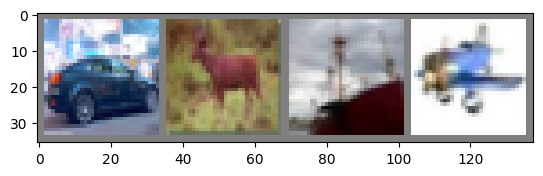

car   deer  ship  plane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #1º capa: convolucional
        self.pool = nn.MaxPool2d(2, 2) #2º capa: pooling
        self.conv2 = nn.Conv2d(6, 16, 5) #3º capa: convolucional

        self.fc1 = nn.Linear(16 * 5 * 5, 120)#4º capa: fully conected
        self.fc2 = nn.Linear(120, 84) #5º capa: fully conected
        self.fc3 = nn.Linear(84, 10)  #6º capa: fully conected

    def forward(self, x): #Define las funciones de activacion
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## Pregunta 3

Explicar el constructor



Aquí hay que tener en cuenta los siguientes conceptos claves:

- Mapa de característica:
    - Resultado de aplicar un filtro o kernel a una imagen de entrada
    - Tantos mapas de características como filtros tengamos
    - Cada mapa resalta diferentes tipos de patrones

- Capas de pooling:
    - Tiene como objetivo principal reducir la dimension de los mapas de características: resumir la informacion y mantener las características mas importantes
    - Se aplica una funcion a regiones ( o submatrices ) de cada mapa
    - MaxPooling : coge el maximo de una submatriz
    
        [1 ,3][4, 2]
        cogería el 4 y reduce 2x2 a 1x1
    
    - Global Average Pooling: calcula el promedio

Esta clase hereda de nn.Module, que es la clase base de todas las redes neuronales en Pytorchy tiene la siguiente estructura:

- conv1 = nn.Conv2d(3, 6, 5):

    - Define la primera capa de convolucion, es decir, el  número de  los primeros filtros/kernels.
    - La funcion Conv2d tiene la siguiente estructura: Conv2d(numero canales, numero de filtros, tamaño del filtro)

        - Número de canales  se refiere a la cantidad de componentes de color o de informacion que contiene la imagen. Si la foto es en blanco y negro el numero de canales es 1; en este caso son RGB(Red.Green Y Blue)  luego son 3 canales
        - Numero de filtros(kernels)
        - El tamaño de filtro se refiere a la matriz. En este caso es 5x5
    
- pool = pool = nn.MaxPool2d(2, 2)
    - Capa de pooling
    - MaxPool2d tiene la siguient estructura MaxPool2d(tamaño, stride):
        - Tamaño indica una matriz tamaño x tamaño
        - Stride indica el numero de casilla que "avanza" a la derecha

- conv2 = nn.Conv2d(6, 16, 5):
    - Define la segunda capa de convolucion
        - 6 canales
        - 16 kernels
        - filtros de tamañon 5x5

Las siguientes variables fc1,fc2,fc3 hacen referencia a los capas de nodos con la imagen aplanada. Para entender sus parametros primero es necesario ver como definimos forwardPropagation:

- Paso 1: Aplicamos la primera capa de convolucion Conv2d(3, 6, 5)
    - Obtendremos 6 mapas de características y cada una de ellas con tamaño 28x28
- Paso 2: Aplicamos una capa de pooling MaxPool2d(2, 2)
    - Obtendremos 6 mapas de características y cada una de ellas con tamaño 14x14
- Paso 3: aplicamos otra capa de convolucion Conv2d(6, 16, 5)
    - Obtendremos 16 mapas de características y cada una de ellas con tamaño 10x10
- Paso 4: volvemos a aplicar la misma capa de pooling MaxPool2d(2, 2)
    - Obtendremos 16 mapas de características y cada una de ellas con tamaño 5x5

Una vez entendido esto, si aplanamos los 16 mapas obtenemos 16x5x5 nodos; los cuales se aplican a  self.fc1 = nn.Linear(16 * 5 * 5, 120), donde nn.Linear(nodos_entrada,nodos salida); despues se aplica fc2 que recibe los 120 nodos de la capa fc1 y tiene como salida 84 conexiones etc...

Una vez definida la forma en la estructura o las capas de la red, definimos la *funcion de perdida* la cual va a permitir optimizar el aprendizaje.

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() #funcion de perdida
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) #Optimizador del descenso de gradiente

Entrenamos la red

Conceptos claves:

- Epoch
    - Numero de veces que se ejecutan los algoritmos de forwardPropagation y backpropagation
    - En cada epoch pasan todos los datos que se establezcan, es decir, si definimos 10 epoch y 10000 instancias, en cada epoch pasaran las 10000 instancias


In [ ]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):


        inputs, labels = data #inputs = 4 fotos, labels = clase a la que pertenecen

        #reiniciar gradiente
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() #Calcula el  gradiente
        optimizer.step() #Hace el descenso

        # print statistics
        running_loss += loss.item() #loss contiene la diferencia; hacer .item() para que sea un numero de tipos que maneja python

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.215
[1,  4000] loss: 2.001
[1,  6000] loss: 1.788
[1,  8000] loss: 1.675
[1, 10000] loss: 1.588
[1, 12000] loss: 1.524
[2,  2000] loss: 1.464
[2,  4000] loss: 1.438
[2,  6000] loss: 1.417
[2,  8000] loss: 1.394
[2, 10000] loss: 1.364
[2, 12000] loss: 1.348
Finished Training


## Pregunta 4
Indica la línea de código donde se realiza el cálculo de los gradientes para determinar cómo modificar los pesos (los filtros kernel), e indica la línea de código donde se recalculan los pesos.
¿Qué se ha tenido que realizar antes para poder hacer el cálculo de gradientes y la
actualización de pesos?

El calculo del gradiente se hace loss.backward y en optimizer.step() se realiza el descenso con el propósito de recalcular los pesos.
Sin embargo, antes de hacer esto, es necesario "reiniciar" el gradiente (optimizer.zero_grad) y calcular el resultado de la funcion de perdida (loss = criterion (outputs,labels))

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [ ]:
outputs = net(images)
print(outputs)

tensor([[-2.9093, -3.7795,  1.5279,  3.5850,  1.5731,  2.6207,  4.0621,  0.7593,
         -4.0595, -4.4229],
        [-2.9495, -3.1690,  2.5790,  3.0325,  1.3102,  3.3763,  1.3888,  2.4895,
         -4.6736, -3.6315],
        [-0.1806, -0.1759,  0.8334, -0.7589,  2.3354,  0.7008,  0.4037,  1.0505,
         -2.7326, -1.9684],
        [-1.4586, -2.1907,  1.6165, -0.3540,  1.9734,  0.8300, -1.0732,  4.9112,
         -3.1917, -1.3719]], grad_fn=<AddmmBackward0>)


## Pregunta 5
¿Cuál es la estructura de los outputs que se obtienen en outputs = net(images)?

Se obtiene un tensor, en la que cada componente representa los valores que ha predecido la red para cada imagen, en este caso, hay 4 imagenes y 10 valores predecidos por imagen

# PRÁCTICA


Cargar datos antes de definir cada modelo.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5), (0.5))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.43MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.44MB/s]


Definimos la clase Modelo junto con las siguientes funciones:

* **__init__ (Constructor):**

    - Inicializa la red neuronal, el tamaño del lote, el número de épocas y la tasa de aprendizaje.

    - Configura el optimizador (SGD) y la función de pérdida (CrossEntropyLoss).

    - Carga los conjuntos de entrenamiento y prueba en DataLoader para manejarlos en lotes.

* **entrenarModelo**

    - Entrena la red neuronal durante el número de épocas definido.

    - Itera sobre los lotes de datos, calcula la pérdida, realiza la retropropagación y actualiza los pesos.

    - Muestra la pérdida promedio por época.

* **precision**

    - Evalúa la precisión del modelo en el conjunto de prueba.

    - Calcula la precisión total y la precisión por clase.

* **cargarModelo**

   - Carga los pesos de un modelo previamente entrenado desde un archivo.

In [ ]:
#Definimos una clase: recibe la red

#dos funciones : entrenar y calcularPrecision(total y por clases)

class Modelo:

  def __init__(self,modelo,batch_size,num_epochs,trainset,testset,lr):

    #Datos red
    self.modelo = modelo #Red neuronal
    self.batch_size = batch_size #Tamaño del batch
    self.num_epochs = num_epochs #Numero de epochs
    self.lr = lr

    #Optimizador y funcion de perdida
    self.optimizer = optim.SGD(self.modelo.parameters(), lr=self.lr, momentum=0.9) #Optimizador del descenso de gradiente
    self.criterion = nn.CrossEntropyLoss() #funcion de perdida

    #Datos entrenamiento y test
    self.trainset = trainset  #Conjunto de entrenamiento
    self.testset = testset    #Conjunto de test
    self.trainloader = torch.utils.data.DataLoader(self.trainset, batch_size= self.batch_size,shuffle=True, num_workers=2) #Conjunto dividido en batchs
    self.testloader = torch.utils.data.DataLoader(self.testset, batch_size= self.batch_size, shuffle=False, num_workers=2)


  def entrenarModelo(self):

    for epoch in range(self.num_epochs):
      running_loss = 0.0
      for i, data in enumerate(self.trainloader, 0):
        input,labels = data

        #Reiniciar gradiente
        self.optimizer.zero_grad()

        # forward + backward + optimize
        outputs = self.modelo(input)
        loss = self.criterion(outputs,labels)
        loss.backward() #Calcula el  gradiente
        self.optimizer.step() #Hace el descenso

        # print statistics
        running_loss += loss.item() #loss contiene la diferencia; hacer .item() para que sea un numero de tipos que maneja python

      print(f'epoch: {epoch}, loss: {running_loss / 70000:.3f}')
      running_loss = 0.0

    print('Finished Training')


  def precision(self): #Calcula precision total y precision por clases

    #Por clases
    correct_pred = {clase: 0 for clase in range(0,10)} #num correctas por clase
    total_pred = {clase: 0 for clase in range(0,10)} #num total por clase

    #Total
    correct = 0 #total correctas
    total = 0 #total

    #Calculamos el numero de aciertos por cada clase
    with torch.no_grad():

        for data in self.testloader: #Cargamos los datos del conjunto de test dividido en batches
            #Separamos imagenes y etiquetas
            images, labels = data

            #Calculamos la prediccion de la red
            outputs = self.modelo(images)
            _, predictions = torch.max(outputs, 1) #valores, indices


            #Calculamos computo total
            total += labels.size(0) #0 porque devuelve un tensor con el numero
            correct += (predictions == labels).sum().item() #Comparamos resultado real con prediccion

            #Comparamos resultado real con prediccion
            for label, prediction in zip(labels, predictions):

                if label == prediction:
                    correct_pred[label.item()] += 1

                total_pred[label.item()] += 1

    precisionTotal = 100 * correct // total
    precisionClases = {}

    for clase, correctas in correct_pred.items():
        precision = 100 * float(correctas) / total_pred[clase]
        precisionClases[clase] = precision


    return  precisionTotal, precisionClases

  def cargarModelo(self,path): #Sirve para cargar redes neuronales ya entrenadas
    self.modelo.load_state_dict(torch.load(path))



##  Modelo 1
Para este primer modelo vamos a definir una red con 2 capas convolucionales y una funcion de pooling(MaxPool). La estructura y el forward es la siguiente:

- 1º capa:
  - 1 canal de entrada
  - 6 kernels de tamaño 5x5
  - Resultado : 6 mapas de característica de tamaño 24x24

- Pooling:
  - Tamaño 2x2
  - Avanza 2 pixeles
  - Se aplica solo a la primera capa convolucional
  - Resultado: 6 mapas de característica de tamaño 12x12

- 2º capa:
  - 6 canales de entrada
  - 16 filtros de tamaño 5x5
  - Resultado : 16 mapas de característica de tamaño 8x8

- 3º capa:
  - Capa completamente conectada
  - Entrada: 16x8x8 nodos
  - Salida: 120 nodos

- 4º capa:
  - Capa completamente conectada
  - Entrada: 120 nodos
  - Salida: 84 nodos

- 5º capa:
  - Capa completamente conectada
  - Entrada: 84 nodos
  - Salida: 10 nodos

Además:

- Batch size : 4 imagenes
- Numero de epochs : 2


In [ ]:
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) #1º capa: convolucional
        self.pool = nn.MaxPool2d(2, 2) #2º capa: pooling
        self.conv2 = nn.Conv2d(6, 16, 5) #3º capa: convolucional

        self.fc1 = nn.Linear(16 * 8 * 8, 120)#4º capa: fully conected
        self.fc2 = nn.Linear(120, 84) #5º capa: fully conected
        self.fc3 = nn.Linear(84, 10)  #6º capa: fully conected

    def forward(self, x): #Define las funciones de activacion
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Instanciamos la clase Net1 y proporcionamos los parámetros clave, como el tamaño del lote por iteración y la tasa de aprendizaje.

In [ ]:
red1 = Net1()
modelo1 = Modelo(red1,batch_size=4,num_epochs=2,trainset=trainset,testset=testset,lr=0.001)

Mostramos un batch para ver como son las fotos.

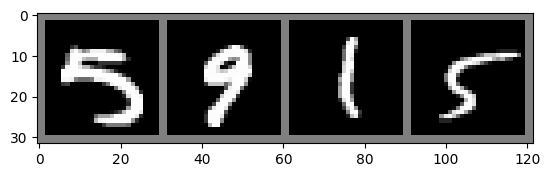

5     9     1     5    


In [ ]:

dataiter = iter(modelo1.trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{str(label.item()):5s}' for label in labels))


Entrenamos el modelo.

In [ ]:
inicio = time.time()
modelo1.entrenarModelo()
fin = time.time()
tiempo1 = fin-inicio

print("Tiempo de entrenamiento 1: ", tiempo1) #tiempo en segundos

epoch: 0, loss: 0.050
epoch: 1, loss: 0.013
Finished Training
Tiempo de entrenamiento 1:  195.4192910194397


In [ ]:
torch.save(modelo1.modelo.state_dict(), 'modelo1.pth') #Guardar modelo en un archivo

Ejecutamos este fragmento únicamente para cargar el modelo desde un archivo, evitando así tener que volver a entrenarlo cada vez que reiniciamos el notebook.

In [ ]:

red1 = Net1()
modelo1 = Modelo(red1,batch_size=4,num_epochs=2,trainset=trainset,testset=testset,lr=0.001)
modelo1.cargarModelo('./modelo1.pth')

Definimos una función para generar un diagrama de barras que muestre la precisión del modelo en cada clase, permitiendo así comparar diferentes modelos.


In [ ]:

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Definimos funcion para dibujar diagrama de barras
def diagramaBarras(precisionTotal,precisionClases):
  # Crear el gráfico de barras
  claves = list(precisionClases.keys())
  valores = list(precisionClases.values())
  plt.figure(figsize=(10, 5))
  bars = plt.bar(claves, valores, color='skyblue')

  #Pone el porcentaje encima de la barra
  for bar, value in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{value:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

  # Etiquetas
  plt.xlabel("Categorías")
  plt.ylabel("Valores")
  plt.title("Precision total:"+ str(precisionTotal)+"%")
  plt.xticks(claves)
  # Mostrar la gráfica
  plt.show()
    # Mostrar la gráfica
  plt.show()

Evaluamos la precisión del modelo en cada clase y dibujamos su diagrama de barras con ayuda de las funciones anteriormente especificadas.

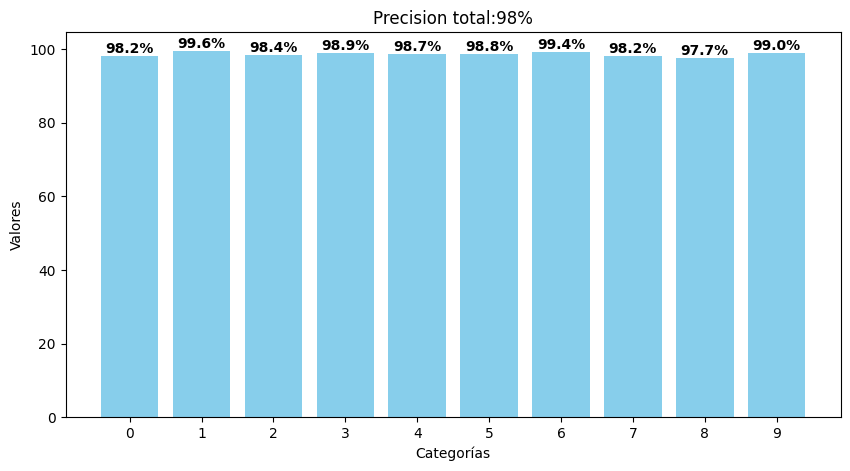

In [ ]:
precisionTotal, precisionClase = modelo1.precision()
diagramaBarras(precisionTotal,precisionClase)

Mostramos un batch para examinar las imágenes y observar cuál es la clase real y cuál es la clase predicha por la red.

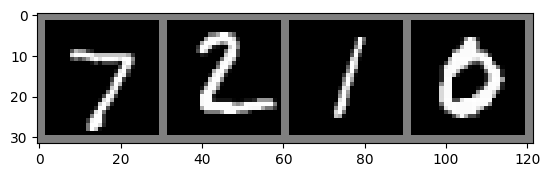

Clase real:     7     2     1     0    
Clase predicha: 7     2     1     0    


In [ ]:
#Probar un ejemplo
#Mostramos un batch para ver como son las fotos
dataiter = iter(modelo1.testloader)
images, labels = next(dataiter)
predicts = modelo1.modelo(images)
_, predicciones = torch.max(predicts, 1) #valores, indices
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("Clase real:     " +' '.join(f'{str(label.item()):5s}' for label in labels))
print("Clase predicha: "+ ' '.join(f'{str(prediccion.item()):5s}' for prediccion in predicciones))




Podemos observar que la precisión total obtenida es del 98%, con valores individuales por clase que oscilan entre 99.5% y 96.5%. La alta precisión sugiere que el modelo tiene una buena capacidad de generalización, lo cual puede indicar que la arquitectura de la red es adecuada para la tarea. Debido al número de capas y a los parámetros elegidos para la red el tiempo de entrenamiento ha sido relativamente alto(195 segundos = 3mins) .Teniendo en cuenta esto, la pregunta que nos surge al observar la precisión de cada clase en la red es si podríamos obtener resultados parecidos o igual de buenos disminuyendo la complejidad de la red (modificando el número de capas, el batch_size...) . Para explorar esta duda planteamos el Modelo 2.

# Modelo 2

Para el segundo  modelo vamos a definir una red con 1 capa convolucional y una funcion de pooling(MaxPool). La estructura y el forward es la siguiente:

- 1º capa:
  - 1 canal de entrada
  - 16 kernels de tamaño 5x5
  - Resultado : 16 mapas de característica de tamaño 24x24

- Pooling:
  - Tamaño 2x2
  - Avanza 2 pixeles
  - Se aplica solo a la primera capa convolucional
  - Resultado: 16 mapas de característica de tamaño 12x12

- 3º capa:
  - Capa completamente conectada
  - Entrada: 16x12x12 nodos
  - Salida: 84 nodos

- 4º capa:
  - Capa completamente conectada
  - Entrada: 84 nodos
  - Salida: 10 nodos

Además:

- Batch size : 64 imagenes
- Numero de epochs : 1
- lr = 0.1

In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5) #1º capa: convolucional
        self.pool = nn.MaxPool2d(2, 2) #2º capa: pooling

        self.fc1 = nn.Linear(16 * 12 * 12, 84)#3º capa: fully conected
        self.fc2 = nn.Linear(84, 10)  #4º capa: ultima capa

    def forward(self, x): #Define las funciones de activacion
        x = self.pool(F.relu(self.conv1(x)))

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

net2 = Net2()

Inicializamos la red.

In [ ]:
red2 = Net2()
modelo2 = Modelo(red2,batch_size=64,num_epochs=1,trainset=trainset,testset=testset,lr=0.1)

Entrenamos el modelo.

In [ ]:
inicio = time.time()
modelo2.entrenarModelo()
fin = time.time()
tiempo2 = fin-inicio

print("Tiempo de entrenamiento 2: ", tiempo2) #tiempo en segundos

epoch: 0, loss: 0.002
Finished Training
Tiempo de entrenamiento 2:  26.119951248168945


In [ ]:
torch.save(modelo2.modelo.state_dict(), 'modelo2.pth') #Guardar modelo en un archivo

Incorporamos esta celda de código, al igual que en el modelo anterior, para evitar tener que entrenar el modelo cada vez que reiniciemos el notebook.

In [ ]:
net2 = Net2()
modelo2 = Modelo(red2,batch_size=64,num_epochs=6,trainset=trainset,testset=testset,lr=0.1)
modelo2.cargarModelo('./modelo2.pth')

Calculamos las precisiones y dibujamos el diagrama de barras para poder analizar los resultados.

97
{0: 98.57142857142857, 1: 99.38325991189427, 2: 95.83333333333333, 3: 96.43564356435644, 4: 99.4908350305499, 5: 99.2152466367713, 6: 97.7035490605428, 7: 96.78988326848248, 8: 97.63860369609856, 9: 91.97224975222993}


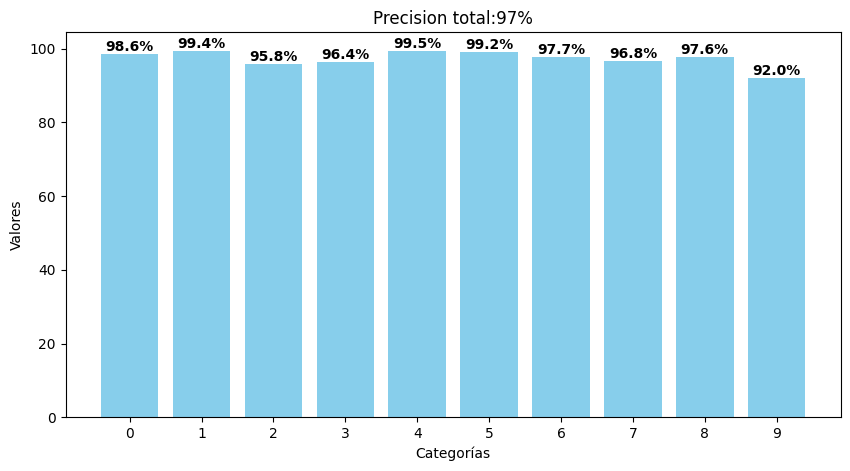

In [ ]:
precisionTotal2,precisionClase2 = modelo2.precision()
print(precisionTotal2)
print(precisionClase2)
diagramaBarras(precisionTotal2,precisionClase2)

El Modelo 2 parece una excelente opción para la clasificación de números, ya que ofrece una combinación de eficiencia y buen rendimiento en tareas sencillas. Su menor complejidad lo hace ideal para esta tarea específica, y dado que los resultados obtenidos son satisfactorios, se trata de una solución efectiva. El tiempo de entrenamiento (26 segundos) ha sido menor para este modelo que para el modelo 1. Además, la complejidad en esta red es menor que la del modelo 1. Aún así, obtenemos unos resultados muy semejantes para ambos modelos que se pueden observar en los diagramas de precisión por lo que creemos que este modelo sería más adecuado para la tarea ya que proporciona un buena relación rendimiento/efectividad.

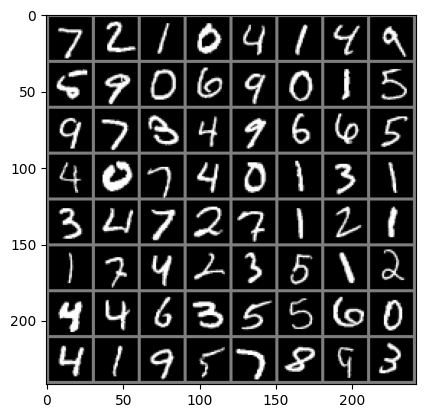

Clase real:     7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1     3     4     7     2     7     1     2     1     1     7     4     2     3     5     1     2     4     4     6     3     5     5     6     0     4     1     9     5     7     8     9     3    
Clase predicha: 7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1     3     4     7     2     7     1     2     1     1     7     4     2     3     5     1     2     4     4     6     3     5     5     6     0     4     1     9     5     7     8     5     3    


In [ ]:
#Probar un ejemplo
#Mostramos un batch para ver como son las fotos
dataiter = iter(modelo2.testloader)
images, labels = next(dataiter)
predicts = modelo2.modelo(images)
_, predicciones = torch.max(predicts, 1) #valores, indices
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("Clase real:     " +' '.join(f'{str(label.item()):5s}' for label in labels))
print("Clase predicha: "+ ' '.join(f'{str(prediccion.item()):5s}' for prediccion in predicciones))

Podemos observar como el Modelo 2 predice correctamente todas las clases.

#Modelo 3


Definimos una red con una capa convolucional, una capa de pooling y dos capas completamente conectadas. La estructura y el forward son los siguientes:

* 1ª capa:

    * 1 canal de entrada

    * 6 kernels de tamaño 5x5

    * Resultado: 6 mapas de características de tamaño 24x24

* Pooling:

    * Tamaño 6x6

    * Avanza 6 píxeles

    * Se aplica solo a la primera capa convolucional

    * Resultado: 6 mapas de características de tamaño 4x4

* 3ª capa:

    * Capa completamente conectada

    * Entrada: 6x4x4 nodos

    * Salida: 10 nodos

* Parámetros adicionales:

    * Tamaño del batch: 24

    * Número de épocas: 1

    * Tasa de aprendizaje: 0,2

In [ ]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) #1º capa: convolucional
        self.pool = nn.MaxPool2d(6, 6) #2º capa: pooling

        self.fc1 = nn.Linear(6 * 4 * 4, 10)#4º capa: fully conected

    def forward(self, x): #Define las funciones de activacion
        x = self.pool(F.relu(self.conv1(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        return x


Inicializamos la red.

In [ ]:
red3 = Net3()
modelo3 = Modelo(red3,batch_size=24,num_epochs=1,trainset=trainset,testset=testset,lr=0.2)

Entrenamos el modelo. Importante: si quieres obtener los mismos resultados y acelerar el proceso, puedes ejecutar directamente la celda [30], donde ya hemos guardado y cargado el modelo previamente entrenado.

In [ ]:
inicio =  time.time()
modelo3.entrenarModelo()
fin = time.time()
tiempo3 = fin-inicio

print("Tiempo de entrenamiento 3: ", tiempo3) #tiempo en segundos

epoch: 0, loss: 0.082
Finished Training
Tiempo de entrenamiento 3:  23.386436223983765


In [ ]:
torch.save(modelo3.modelo.state_dict(), 'modelo3.pth') #Guardar modelo en un archivo


Con esta celda cargamos el modelo ya entrenado, evitando tener que repetir el proceso de entrenamiento cada vez que reiniciemos el Notebook.

In [ ]:
red3 = Net3()
modelo3 = Modelo(red3,batch_size=64,num_epochs=6,trainset=trainset,testset=testset,lr=0.1)
modelo3.cargarModelo('./modelo3.pth')

Calculamos la precisión obtenida para cada clase y representamos los resultados en un diagrama de barras.

11
{0: 0.0, 1: 100.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


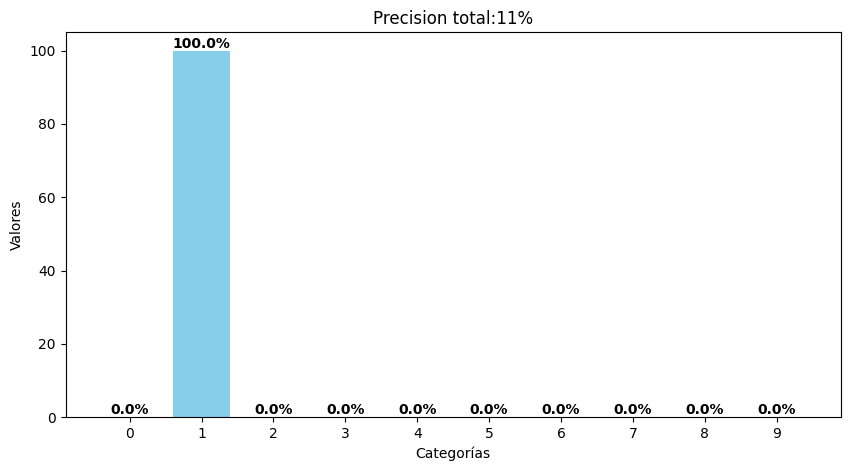

In [ ]:
precisionTotal3,precisionClase3 = modelo3.precision()
print(precisionTotal3)
print(precisionClase3)
diagramaBarras(precisionTotal3,precisionClase3)

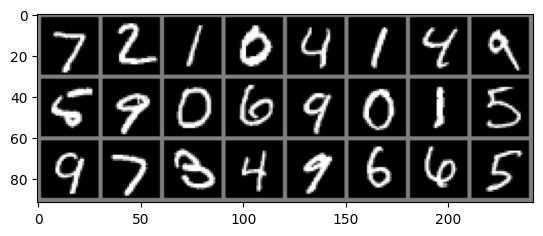

Clase real:     7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5    
Clase predicha: 1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1    


In [ ]:
#Probar un ejemplo
#Mostramos un batch para ver como son las fotos
dataiter = iter(modelo3.testloader)
images, labels = next(dataiter)
predicts = modelo3.modelo(images)
_, predicciones = torch.max(predicts, 1) #valores, indices
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("Clase real:     " +' '.join(f'{str(label.item()):5s}' for label in labels))
print("Clase predicha: "+ ' '.join(f'{str(prediccion.item()):5s}' for prediccion in predicciones))

Aquí podemos observar como la clase predicha por la red es siempre la 1.

En estos resultados podemos observar que el Modelo 3 solo logra predecir correctamente una clase.Se aprecia como el modelo siempre tiende a predecir la clase 1, lo que explica que la precisión para esa clase sea del 100 %, mientras que para el resto de las clases es nula. Creemos que esto se debe a que la red se quede atrapada en un minimo local debido a que el lr es relativamente alto comparado con los otros modelos

## Conclusión
A partir del análisis de los tres modelos propuestos, podemos observar cómo la complejidad y estructura de la red influyen en el rendimiento obtenido. El Modelo 1 presenta una arquitectura más compleja y, aunque ofrece una precisión total muy alta (98 %), requiere un tiempo de entrenamiento considerablemente mayor. El Modelo 2, en cambio, consigue resultados similares en términos de precisión, pero con una estructura más sencilla y eficiente, lo que lo convierte en la opción más adecuada para esta tarea de clasificación, ya que logra un equilibrio óptimo entre rendimiento y coste computacional.
Por otro lado, con el Modelo 3 podemos observar como simplificar en exceso la arquitectura de la red puede provocar que la red no haga correctamente la tarea. Sus resultados muestran que únicamente predice correctamente una clase, lo que evidencia que la red no ha sido capaz de aprender de manera efectiva la distribución de los datos.

En conjunto, este análisis resalta la importancia de encontrar un equilibrio entre complejidad y capacidad de generalización. Mientras que un modelo excesivamente complejo puede implicar un coste computacional innecesario, un modelo demasiado simple puede ser incapaz de resolver adecuadamente la tarea. En este caso, el Modelo 2 representa la solución más eficiente y eficaz.